# 다항 분류(Multinomial 
* 지수함수와 로그함수(정의역-치역을 바꾼 관계)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\dahun\AppData\Local\Temp\ipykernel_13364\710521227.py:3: RuntimeWarning: invalid value encountered in log
  y2 = np.log(x)


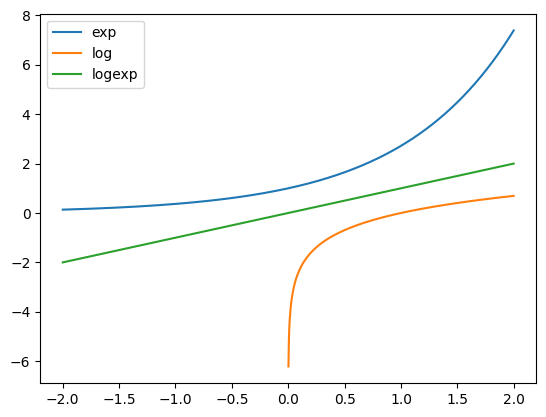

In [8]:
x=np.linspace(-2,2,1000)
y1 = np.exp(x)
y2 = np.log(x)
y3 = np.log(np.exp(x))

plt.plot(x,y1,label = "exp")
plt.plot(x,y2,label = 'log')
plt.plot(x,y3,label = 'logexp')

plt

plt.legend(loc='best')
plt.show()

soft max 는 categorycal - crossentropy , onehot encoding , 

# mongsun2@naver.com 백설희(010-8805-9958)

In [9]:
from sklearn.datasets import load_wine
import numpy as np
wine = load_wine()
x = wine['data']
y = wine['target']
print(np.unique(y))
print(x.shape,y.shape)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(x_train,y_train)
print(x_test,y_test)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train,y_test)

# z점수표준화
import numpy as np
def zscore_standize(x):
    return (x-x.mean(0))/x.std(0)

x_train = np.apply_along_axis(zscore_standize,0,x_train)
x_test = np.apply_along_axis(zscore_standize,0,x_test)

[0 1 2]
(178, 13) (178,)
[[1.316e+01 3.570e+00 2.150e+00 ... 6.000e-01 1.680e+00 8.300e+02]
 [1.281e+01 2.310e+00 2.400e+00 ... 6.600e-01 1.360e+00 5.600e+02]
 [1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 ...
 [1.225e+01 1.730e+00 2.120e+00 ... 1.000e+00 3.170e+00 5.100e+02]
 [1.258e+01 1.290e+00 2.100e+00 ... 5.800e-01 1.550e+00 6.400e+02]
 [1.341e+01 3.840e+00 2.120e+00 ... 9.100e-01 3.000e+00 1.035e+03]] [2 2 0 2 1 0 1 2 0 2 1 0 1 1 0 2 2 1 2 2 1 2 0 2 1 0 2 1 0 1 1 1 1 1 0 0 2
 1 2 0 1 0 1 0 2 1 0 1 2 2 2 2 2 0 1 1 0 2 2 0 0 0 1 1 0 0 0 0 1 0 1 1 2 2
 1 1 2 0 1 0 0 2 0 2 1 1 0 1 2 0 2 2 0 1 1 1 2 1 2 1 1 2 0 2 0 0 0 1 0 0 2
 2 1 0 0 1 1 1 1 2 1 0 1 1 1 2 0 1 0 0 1 1 1 1 0 0 2 0 1 1 2 0]
[[1.373e+01 4.360e+00 2.260e+00 2.250e+01 8.800e+01 1.280e+00 4.700e-01
  5.200e-01 1.150e+00 6.620e+00 7.800e-01 1.750e+00 5.200e+02]
 [1.305e+01 1.730e+00 2.040e+00 1.240e+01 9.200e+01 2.720e+00 3.270e+00
  1.700e-01 2.910e+00 7.200e+00 1.120e+00 2.910e+00 1.150e+03]
 [1.364e

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Flatten, Input,Dropout
import os

model = Sequential()

model.add(Dense(units=64,activation='relu',input_dim=13))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3,activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss',
                        min_delta=0.01,
                        patience=5,
                        verbose=0)



model_dir = 'model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
file_name = 'winemodel_{epoch:05d}_{val_loss:4f}.h5'
filepath = os.path.join(model_dir, file_name)

mc_callback = ModelCheckpoint(
    filepath,
    monitor='val_loss',
    verbose=0,
    save_best_only=True
)


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
# sgd



history = model.fit(x_train,y_train,epochs=100,batch_size=32, validation_data=(x_test, y_test),callbacks=[early_stopping]) # 테스트에 대한 
loss_and_metrics = model.evaluate(x_train,y_train,batch_size=100) # 평가지표?

classes=model.predict(x_train,batch_size=128) # 예측한 결과 y_hat이다.

Epoch 1/100
5/5 [==============================] - 0s 30ms/step - loss: 1.1344 - acc: 0.2913 - val_loss: 0.9116 - val_acc: 0.7778
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8928 - acc: 0.7435 - val_loss: 0.7232 - val_acc: 0.9444
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.7317 - acc: 0.8684 - val_loss: 0.5782 - val_acc: 0.9722
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6238 - acc: 0.9018 - val_loss: 0.4607 - val_acc: 0.9722
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.4713 - acc: 0.9709 - val_loss: 0.3660 - val_acc: 0.9722
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.3570 - acc: 0.9741 - val_loss: 0.2901 - val_acc: 0.9722
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.2979 - acc: 0.9778 - val_loss: 0.2322 - val_acc: 0.9722
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2445 - acc: 0.9543 - va

val_accuracy와 accuracy가 차이가 큰 것은 과적합이라는 뜻

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387       
Total params: 9,603
Trainable params: 9,603
Non-trainable params: 0
_________________________________________________________________


26


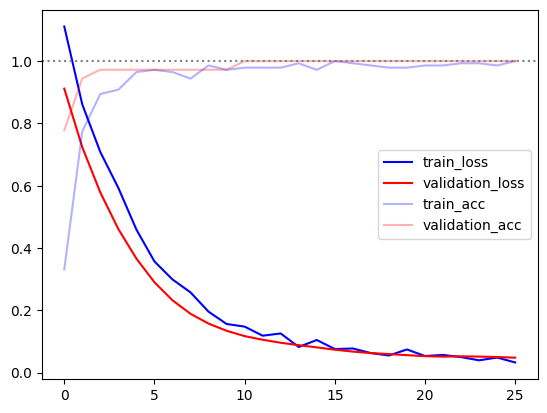

In [28]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']
print(len(train_loss))
indices = range(len(train_loss))
plt.plot(indices, train_loss, label='train_loss', color='blue')
plt.plot(indices, val_loss, label='validation_loss', color='red')
plt.plot(indices, train_acc, label='train_acc', color='blue', alpha=0.3)
plt.plot(indices, val_acc, label='validation_acc', color='red', alpha=0.3)
plt.axhline(1, linestyle=':', color='gray')
plt.legend(loc='best')
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(50,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                270450    
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 255       
Total params: 271,025
Trainable params: 271,025
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

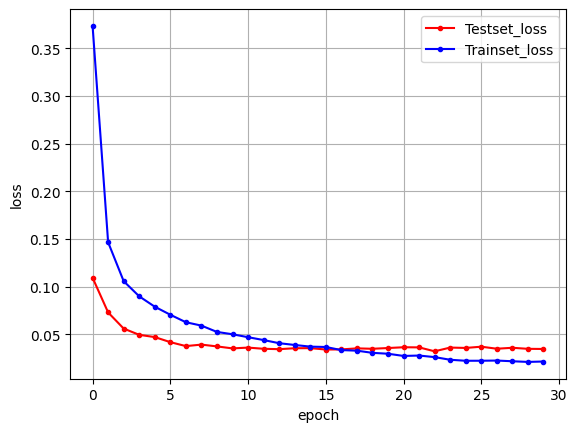

In [32]:
# %load CNNBaseline.py
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# CNN을 위한 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accurary: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 시각화
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [55]:
import os
image_files = os.listdir('Grape/train')
image_files

['Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']

In [60]:
import glob
for file in image_files:
    print(file)


Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


In [ ]:
# CNNBaseline.py를 수정하여 포도잎 질병예측에 활용


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# CNN을 위한 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accurary: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 시각화
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
